In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_gender = pd.read_csv('gender_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
data = df_train.copy()

## I - Exploratory data analysis

In this section I will carry out data cleaning and visualization to the dataset. The features such as ... will be explored to reveal its correlation with the survive/non-survive status. 

In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(891, 12)

In [5]:
sum(data.duplicated())

0

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Cleaning:
Looking at the the Age column of the dataset, only 714 entries contain values while the rest of the entries haev missing values. The empty entries are filled with the median of all ages. 

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [8]:
data['Died'] = 1 - data['Survived']

## relation with sex

In [9]:
data[data.Survived == 1]['Sex'].value_counts()
data['Sex'].value_counts()
male_survive_rate = data[data.Survived == 1]['Sex'].value_counts()[1] * 1.0 / data['Sex'].value_counts()[0] *100
female_survive_rate = data[data.Survived == 1]['Sex'].value_counts()[0] * 1.0 / data['Sex'].value_counts()[1] *100

print "Percentage of female that survived: {} %".format(round(female_survive_rate))
print "Percentage of male that survived: {}%".format(round(male_survive_rate))

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0%


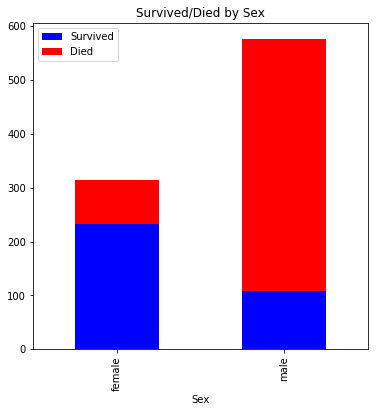

In [10]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].\
plot(kind='bar', stacked = True, figsize=(6, 6), colors=['b', 'r'], title="Survived/Died by Sex");

## Relation with age and sex

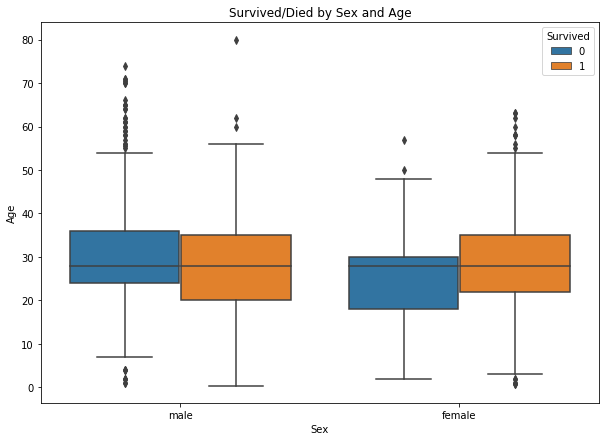

In [11]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='Sex', y='Age', hue='Survived', data=data)
ax.set_title('Survived/Died by Sex and Age');

### relation with embarked

In [12]:
df_embarked = data.groupby(['Embarked','Survived']).size().reset_index(name = 'count').\
pivot(index = 'Embarked', columns = 'Survived', values = 'count')

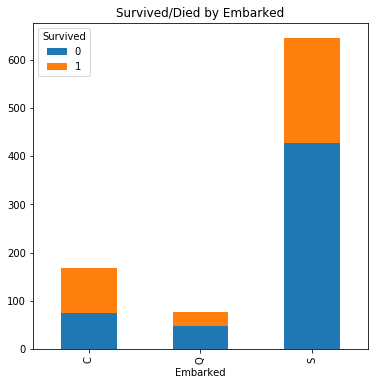

In [13]:
df_embarked.plot(kind = 'bar', figsize = (6,6), stacked=True, title="Survived/Died by Embarked");

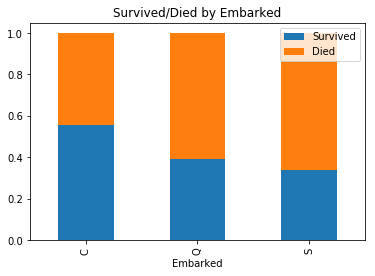

In [19]:
data.groupby(['Embarked']).agg('mean')[['Survived', 'Died']].\
plot(kind = 'bar', stacked = True, figsize = (6, 4), title="Survived/Died by Embarked");

In [46]:
data.groupby(['Embarked']).agg('mean')['Fare']

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

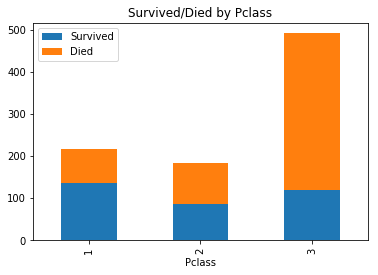

In [20]:
data.groupby(['Pclass']).agg('sum')[['Survived', 'Died']].\
plot(kind = 'bar', stacked = True, figsize = (6, 4), title="Survived/Died by Pclass");

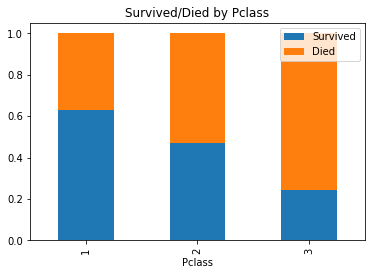

In [21]:
data.groupby(['Pclass']).agg('mean')[['Survived', 'Died']].\
plot(kind = 'bar', stacked = True, figsize = (6, 4), title="Survived/Died by Pclass");

In [17]:
data.groupby(['Pclass']).agg('mean')['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

## Fare 

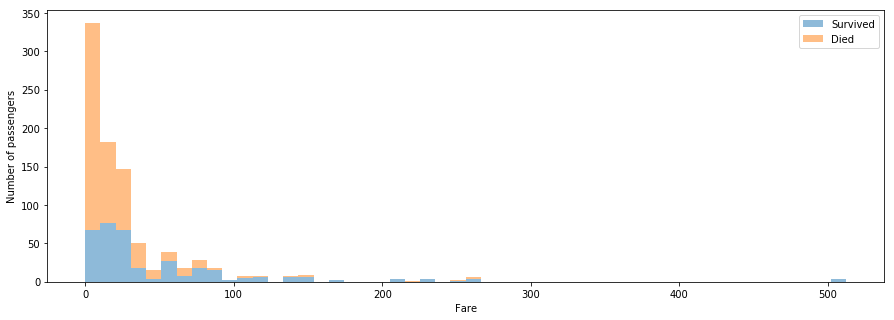

In [45]:
plt.figure(figsize = (15,5))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], stacked = True, alpha = 0.5,\
         label = ['Survived', 'Died'], bins = 50)
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();